## Amirreza Hosseini
**9820363**

Introduction to Data Mining
HomeWork 2 <br>
Q6

In [2]:
import pandas as pd

0-read the csv file and store it in a dataframe and show the Data frame <br/>
Using leave one out method to split the test and train data <br/>
Then using linear SVM as a model for prediction and plot the confusion matrix

In [3]:
iris = pd.read_csv('./iris.csv', sep=',')

iris.drop("Unnamed: 0", axis=1, inplace=True)

iris.head()

,Class,Petal length,Sepal length,Sepal width,Petal width
0,1,51,35,14,2
1,1,49,30,14,2
2,1,47,32,13,2
3,1,46,31,15,2
4,1,50,36,14,2


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Y=iris['Class']
X=iris.drop('Class',axis=1)

# Split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)    

#shape of the data
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [5]:
#linear svm classifier
from sklearn.svm import SVC

# Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel


from sklearn.metrics import accuracy_score, precision_score
train_accuracy = []
train_precision = []

# Train the model using the leave one out training sets
leave_one_out = LeaveOneOut()
for train_index, test_index in leave_one_out.split(X_train):
    X_train1, X_test1 = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train1, Y_test1 = Y_train.iloc[train_index], Y_train.iloc[test_index]
    clf.fit(X_train1, Y_train1)
    Y_pred_train = clf.predict(X_train1)
    train_accuracy.append(accuracy_score(Y_train1, Y_pred_train)) 
    train_precision.append(precision_score(Y_train1, Y_pred_train, average='weighted'))
       

In [6]:
#calculate average accuracy and precision of model for training data
print("Accuracy of model for training data: ",sum(train_accuracy)/len(train_accuracy))
print("Precision of model for training data: ",sum(train_precision)/len(train_precision))

#calculate accuracy of model for testing data
Y_pred_test = clf.predict(X_test)
print("Accuracy of model for testing data: ",accuracy_score(Y_test,Y_pred_test))
print("Precision of model for testing data: ",precision_score(Y_test,Y_pred_test,average='weighted'))

Accuracy of model for training data:  0.9753501400560197
Precision of model for training data:  0.9755004370862833
Accuracy of model for testing data:  1.0
Precision of model for testing data:  1.0


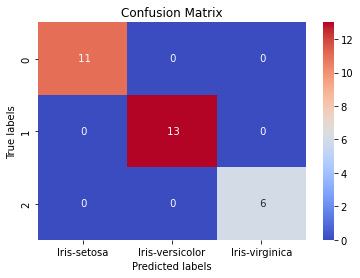

In [7]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y,y_predict):
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

#show confusion matrix for testing data
plot_confusion_matrix(Y_test,Y_pred_test)

The confusion matrix shows the best result for all of the three labels of iris categories.<br/>
The model predicted all of the cases in a correct way.

1- SVM kernel with polynomial

Text(0.5, 1.0, 'Miscalssification Error for each Degree')

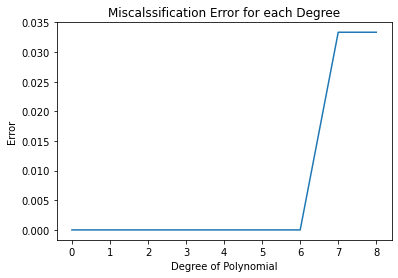

In [21]:
#polynomial svm classifier
from sklearn.svm import SVC

errors=list()

for i in range(1,10):
    svc = SVC(kernel='poly', degree=i)
    #find misclassification error
    svc.fit(X_train, Y_train)
    Y_pred_test = svc.predict(X_test)
    errors.append(1-accuracy_score(Y_test,Y_pred_test))

sns.lineplot(errors)
plt.ylabel('Error')
plt.xlabel('Degree of Polynomial')
plt.title('Miscalssification Error for each Degree')

As the chart shows, The classification error raises directly as the degree of polynomial increases.

2- hyper parameters tunning : find best degree by grid search

In [28]:
from sklearn.model_selection import GridSearchCV

#svm parameters degree in range 1-10
svc_params = {'degree':range(1,10),'kernel':['poly']}

svc_cv = GridSearchCV(SVC(),svc_params,cv=10)
svc_cv.fit(X_train, Y_train)
print("Best Parameters :",svc_cv.best_params_)
print("GridSearch Score :",(svc_cv.best_score_*100).round(2),'%')

svc.fit(X_train,Y_train)
Y_pred_test = svc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred_test)
print('SVC Model Accuracy:',(accuracy*100).round(2),'%')

Best Parameters : {'degree': 5, 'kernel': 'poly'}
GridSearch Score : 95.83 %
SVC Model Accuracy: 96.67 %


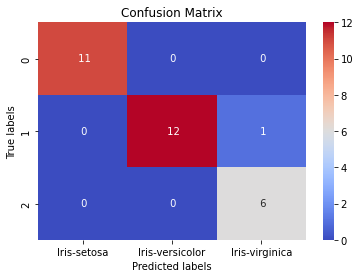

In [29]:
#show confusion matrix for testing data
plot_confusion_matrix(Y_test,Y_pred_test)